-------------------------------------------------------------------------------------------------------------------------------
Copyright:

Ce notebook a été conçu  et rédigé par Linda Marrakchi-Kacem pour l'atelier Python qui s'inscrit dans le cadre du mastère TICV pour l'année 2022-2023. Toute utilisation ou distribution de ce notebook en dehors du cadre de l'atelier doit porter la mention du nom de l'auteur.  

-------------------------------------------------------------------------------------------------------------------------------

# Chapitre 2 : Correction d'images médicales

Ce notebook accompagne votre deuxième cours de correction d'images médicales. Il a pour objectif de vous montrer quelques exemples de méthodes de correction qu'on peut appliquer à des images issues de l'Imagerie par Résonnance Magnétique:
- Correction du biais des intensités
- Normalisation des intensités
- Filtrage

Pour pouvoir faire les exercices de ce notebook vous devez au préalable vérifier que les nouvelles librairies suivantes sont installées (en plus de celles déjà installées lors des séances précédentes) et les installer dans le cas contraire:
- `SimpleITK ` : bibliothèque pour le traitement d'images qui contient plusieurs fonctionalités compatibles avec différents formats d'images dont les formats d'imagerie médicale.

Les images de ce notebook proviennent du site: https://www.cancerimagingarchive.net/

## Exercice1:

L'objectif de cet exercice est d'appliquer une correction du biais des intensités à une image IRM.

1) En vous inspirant des codes développés dans le notebook 1, convertissez le volume dicom contenu dans le répertoire "t1_bias" au format nifti et nommez le nouveau fichier "t1_with_bias.nii".

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


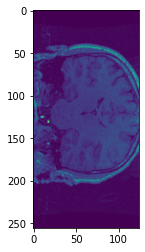

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import os
! pip install pydicom
import pydicom
import zipfile
import numpy as np
import pydicom as dicom
! pip install dicom2nifti
import dicom2nifti as df
import nibabel as nb
with zipfile.ZipFile("/content/t1_bias/DICOM_3D_volume.zip","r") as zip_ref:
    zip_ref.extractall("/content/t1_bias")
    path = ("/content/t1_bias/DICOM_3D_volume")

df.convert_directory(path, "/content/t1_bias")

from nibabel.testing import data_path
t1_bias ='/content/t1_bias/7_3d_volume.nii.gz'
load = nb.load(t1_bias)
plt.imshow(load.get_fdata()[:,100,:])

os.rename('/content/t1_bias/7_3d_volume.nii.gz', 't1_with_bias.nii')


2) Créez un nouveau fichier python que vous appellerez "utils.py". Mettez dedans les fonctions de visualisation que vous avez développées lors de l'atelier précédent puis importez les fonctions explore_3dimage_axial, explore_3dimage_coronal et explore_3dimage_sagital.

In [ ]:
import ipywidgets
from ipywidgets import interact,fixed
from utils import explore_3dimage_axial

3) Affichez l'image t1_with_bias avec la fonction explore_3dimage_axial comme vous avez fait lors de la séance précédente.

In [ ]:
explore_3dimage_axial(),load)

NameError: ignored

4) Affichez l'image t1_with_bias cette fois-ci en vue coronale. Que remarquez vous?

5) Question bonus facultative: Que peut on faire pour avoir un affichage correct? Astuce: regarder certains paramètres caractéristiques de l'image dans l'entête de l'image nifti et modifier la fonction d'affichage.

6) Lisez maintenant le fichier nifti "t1_with_bias.nii" en utilisant la librairie sitk et affichez sa taille. Comparez sa taille avec la taille du même fichier lu avec la librairie nibabel.

7) L'image que vous avez affichée en vue axiale est plus sombre dans la partie antérieure du cerveau par rapport à la partie postérieure. Cet effet est essentiellement dû aux inhomogéneités du champs magnétique. Il existe plusieurs méthodes de correction d'inhomogéneités du champs. Nous allons aujourd'hui tester celle disponible dans la librairie sitk. Utilisez la fonction sitk.N4BiasFieldCorrectionImageFilter() pour corriger l'image.
Remarque: Pendant que le code tourne, lisez les articles suivants:
- https://www.nitrc.org/docman/view.php/6/880/sled.pdf
- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3071855/

8) Sauvegardez l'image corrigée du biais sous le nom "t1_bias_corrected.nii".